<p align="center"> <img style=" margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="350" height="150" /> 
    
    
## <H1 align="center"> <font color='white'> Quantitative Finance </H1>

### <H3 align="center"> <font color='white'> Price Simulation, Tests and Conclusions </H1>

 <H5 align="center"> <em> Professor: Zárate Carbajal José Mario <em>

 <strong> <H5 align="right"> Student: Márquez Delgado Esteban <strong>

 *Registry*: if700637

 Date: September 12, 2022

 <center> <font color= #555555> <font size = 4> Ago 2022 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/EstebanMqz/Quantitative-Finance/blob/main/Tarea%201_Márquez%20Delgado%20Esteban.ipynb'>Link</a></font>

#### <font color= lightblue> <font size = 4> 0. *Functions and Libraries*  </font>

In [26]:
#Libraries
import pandas as pd
import numpy as np
import scipy.stats as st #Statistics lib
from yahoofinancials import YahooFinancials #Financial data download solution 1
import pandas_datareader as pdr
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt #Visualization lib in matplot.
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions #PDF identification library

In [27]:
def plot(closes, titulo):
    """
    Plot historical prices of asset(s) or time series.
    *closes : Historical prices.
    *title: Title of the df
    """
    #Styles 
    plt.style.use('dark_background')
    plt.rc('grid', linestyle="--", color='gray')
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    
    #Plot
    closes.plot(ax=ax, label = 'Precios')
    plt.title(titulo)
    plt.grid(True)
    plt.legend(loc = "best")

    #%% Quick Report
def dqr(data):
    
    cols = pd.DataFrame(list(data.columns.values),
                           columns=['Name'],
                           index=list(data.columns.values))
    dtyp = pd.DataFrame(data.dtypes,columns=['Type'])
    misval = pd.DataFrame(data.isnull().sum(),
                                  columns=['N/A value'])
    presval = pd.DataFrame(data.count(),
                                  columns=['Count values'])
    unival = pd.DataFrame(columns=['Unique values'])
    minval = pd.DataFrame(columns=['Min'])
    maxval = pd.DataFrame(columns=['Max'])
    mean =pd.DataFrame(data.mean(), columns=['Mean']) 
    Std =pd.DataFrame(data.std(), columns=['Std']) 
    Var =pd.DataFrame(data.var(), columns=['Var']) 
    median =pd.DataFrame(data.median(), columns=['Median']) 
    
    skewness = pd.DataFrame(data.skew(), columns=['Skewness']) 
    kurtosis = pd.DataFrame(data.kurtosis(), columns=['Kurtosis']) 

    for col in list(data.columns.values):
        unival.loc[col] = [data[col].nunique()]
        try:
            minval.loc[col] = [data[col].min()]
            maxval.loc[col] = [data[col].max()]
        except:
            pass
    
    # Join table
    return cols.join(dtyp).join(misval).join(presval).join(unival).join(minval).join(maxval).join(mean).join(Std).join(Var).join(median).join(skewness).join(kurtosis)


def BoxHist(data, size, color, title):
    """

    BoxHist plots a boxplot and a histogram for a given cuantitative dataset.

    *data : dataset.
    *size : Size tupla (width, height).
    *color : Plots color.
    *title : Title.   
    """
    fig, axes = plt.subplots(1, 2, figsize = size)
    fig.suptitle(title)
    #plt.text(.5,.5,str('Mean = %')+str(round(data.mean(),2)))
    sns.boxplot(x = data, ax = axes[0], color = color, showmeans=True, meanprops={"marker":"*","markerfacecolor":"white","markersize":"6.5"})
    sns.histplot(x = data, ax = axes[1], kde = True, color = color)

#### <font color= lightblue> <font size = 4> 1. *Data download.*  </font>

In [28]:
ticker = "GOOG" 
yahoo_financials = YahooFinancials(ticker)
data = yahoo_financials.get_historical_price_data("2012-01-01", "2022-01-01", "daily") #12 years of data
df = pd.DataFrame(data[ticker]["prices"])
data=pd.DataFrame(df.adjclose)
data

,adjclose
0,16.573130
1,16.644611
2,16.413727
3,16.189817
4,15.503389
...,...
2512,148.063995
2513,146.447998
2514,146.504501
2515,146.002502


#### <font color= lightblue> <font size = 4> 2. *Metrics calculation ($r_t$, $μ_r$ and σ).*  </font>

In [29]:
data["R"]=data.adjclose.pct_change() #Returns
mu_R=data.R.mean() #Daily mean
sig_R=data.R.std() #Std
N=len(data) #252*12 

summary = pd.DataFrame({"E(r)" : mu_R*252, "σ" : (sig_R)*np.sqrt(252)}, index = ["Metrics (Yr)"])
summary

,E(r),σ
Metrics (Yr),0.248729,0.25218


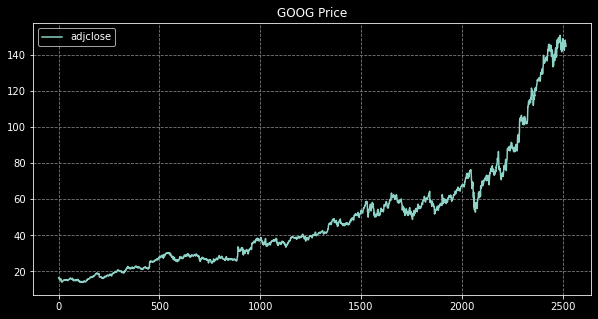

In [30]:
plot(pd.DataFrame(data.adjclose), str(ticker) + ' Price')

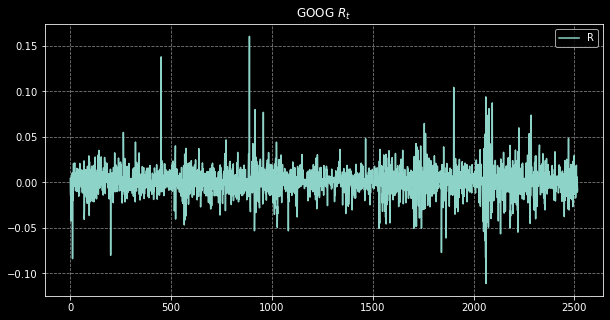

In [31]:
plot(pd.DataFrame(data.R), str(ticker) + ' $R_t$')

#### <font color= lightblue> <font size = 4> 3. *Price Simulation*  </font>

Model 1:

$S_n = S_0+e^{(\mu-\frac{\sigma^2}{2})n + \sigma + W_n}$

*Note: The results of the following simulation is not constant.*

In [32]:
S=np.zeros(N) #252*12
W=np.random.normal(size=N) #Random Walks
So=data.iloc[1,0] #Price 
S[0]=So

for w in range(N-1):
    S[w+1]=S[w]*np.exp(mu_R -0.5*sig_R**2 + sig_R*W[w])

S=pd.DataFrame(S)
S.columns=["adjclose"]
S["adjclose"]=S #Retornos
S["R"]=S.adjclose.pct_change()  #Retornos
S["r"]=np.log(S.adjclose)-np.log(S.adjclose.shift(1)) #Retornos logarítmicos
S['adjclose']=S['adjclose'].round(5)
S

,adjclose,R,r
0,16.64461,NaN,NaN
1,16.98581,0.020499,0.020292
2,17.14167,0.009176,0.009134
3,17.16786,0.001528,0.001526
4,17.20785,0.002329,0.002327
...,...,...,...
2512,159.78775,0.027922,0.027539
2513,157.95788,-0.011452,-0.011518
2514,161.62587,0.023221,0.022956
2515,161.80973,0.001138,0.001137


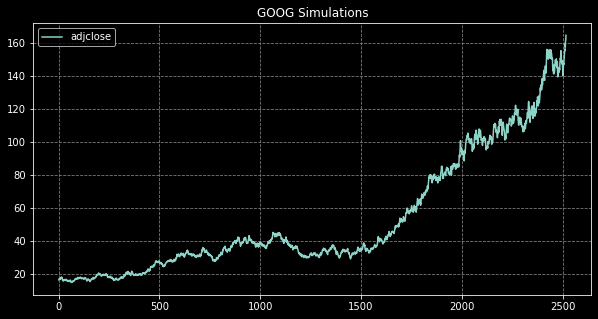

In [33]:
plot(pd.DataFrame(S.adjclose), str(ticker) + ' Simulations')

In [34]:
summary = pd.DataFrame({"E(r)" : S.R.mean()*252, "σ" : S.R.std()*np.sqrt(252)}, index = ["Metrics (Yr)"])
summary

,E(r),σ
Metrics (Yr),0.26156,0.252749


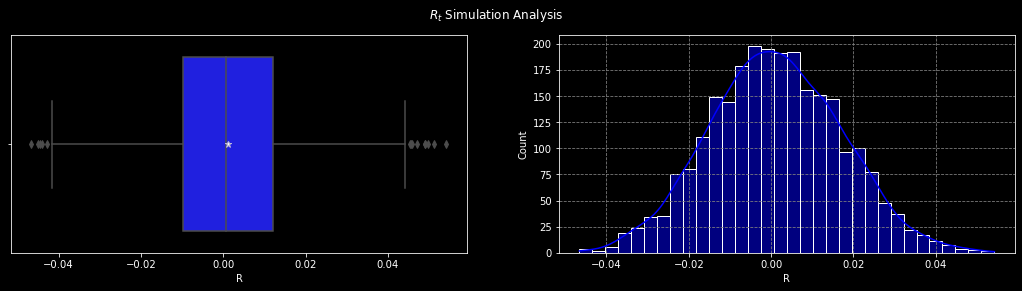

In [35]:
BoxHist(S['R'], (18,4), 'blue', '$R_t$ Simulation Analysis')
plt.grid()

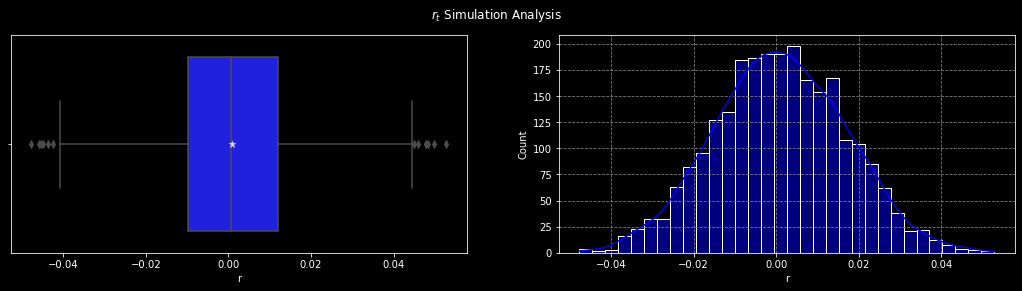

In [36]:
BoxHist(S['r'], (18,4), 'blue', '$r_t$ Simulation Analysis')
plt.grid()

In [37]:
dqr(S)

,Name,Type,N/A value,Count values,Unique values,Min,Max,Mean,Std,Var,Median,Skewness,Kurtosis
adjclose,adjclose,float64,0,2517,2516,15.052810,164.712460,53.667991,37.204616,1384.183475,36.775030,1.141316,0.112431
R,R,float64,1,2516,2516,-0.046600,0.054222,0.001038,0.015922,0.000254,0.000725,0.074625,-0.132102
r,r,float64,1,2516,2516,-0.047721,0.052803,0.000911,0.015901,0.000253,0.000724,0.030320,-0.141921


**Conclusions:** According to the plots and stats, $R_t$ and $r_t$ simulations behavior is similar but the most noticeable change can be observed in their mean and in their kurtosis and their skewness.

#### <font color= lightblue> <font size = 4> 4. *Tests*  </font>

#### <font color= brown>  T Test ($\mu$)

<font color= lightgray>

$H_0$ (Null Hypothesis): Sample means ($\mu$) are equal <font color= lightgreen> ($p_{value}$>$\alpha$).


<font color= lightgray>

$H_a$ (Alternative Hypothesis): Sample Means ($\mu$) are not equal <font color= orange> ($p_{value}$<$\alpha$).

In [38]:
st.ttest_ind(a=S.R[1:], b=S.r[1:], equal_var=True) #dropped na of a.

Ttest_indResult(statistic=0.28292708168691766, pvalue=0.7772443764261258)

<font color= lightgreen> $p_{value}$>$\alpha$:

<font color= lightgray>

**Conclusions:** $H_0$ (Null Hypothesis) can't be rejected, therefore sample means (**$\mu$**) of $R_t$ and $r_t$ are equal.

#### <font color= brown>  Levene ($\sigma^2$)

<font color= lightgray>

$H_0$ (Null Hypothesis): Sample variances ($\sigma^2$) are equal <font color= lightgreen> ($p_{value}$>$\alpha$).


<font color= lightgray>

$H_a$ (Alternative Hypothesis): Sample variances ($\sigma^2$) are not equal <font color= orange> ($p_{value}$<$\alpha$).

In [39]:
st.levene(S.R[1:], S.r[1:]) #dropped na of a.

LeveneResult(statistic=0.0026450031963984005, pvalue=0.9589852450695413)

<font color= lightgreen> $p_{value}$>$\alpha$:

<font color= lightgray>

**Conclusions:** $H_0$ (Null Hypothesis) can't be rejected, therefore variances ($\sigma^2$) of $R_t$ and $r_t$ are equal.

#### <font color= white>  Normality $X\sim\mathcal{N}(\mu,\,\sigma^{2})$

<font color= lightgray>

$H_0$ (Null Hypothesis): Samples are normally distributed $X\sim\mathcal{N}(\mu,\,\sigma^{2})$ <font color= lightgreen> ($p_{value}$>$\alpha$).


<font color= lightgray>

$H_a$ (Alternative Hypothesis): Samples are not normally distributed <font color= orange> ($p_{value}$<$\alpha$).

##### <font color= brown> Returns ($R_t$)

In [40]:
#Returns
st.normaltest(S.R[1:]) #dropped na of a.

NormaltestResult(statistic=4.318624304297167, pvalue=0.11540447446319575)

**Conclusions:** $H_0$ (Null Hypothesis) is rejected, therefore the alternative hypothesis $H_a$ stating that $R_t$ is not normally distributed can be assumed <font color= orange> ($p_{value}$<$\alpha$). 

##### <font color= brown> Log Returns ($r_t$)

In [41]:
st.normaltest(S.r[1:]) #dropped na of a.

NormaltestResult(statistic=2.70728774127, pvalue=0.2582973416534513)

**Conclusions:** $H_0$ (Null Hypothesis) is rejected, therefore the alternative hypothesis $H_a$ stating that $r_t$ is not normally distributed can be assumed <font color= orange> ($p_{value}$<$\alpha$). 

In [42]:
dist=([d for d in dir(st) if isinstance(getattr(st, d), getattr(st, "rv_continuous"))])
dist=dist[0:60] #104 continuous distributions available in Python, sliced to 60. The distributions not adequate for returns delay the execution.
#pd.DataFrame(dist)

{'johnsonsb': (0.6342643014935622, 3.354876233910681, -0.09883473542939863, 0.22004633556084754)}


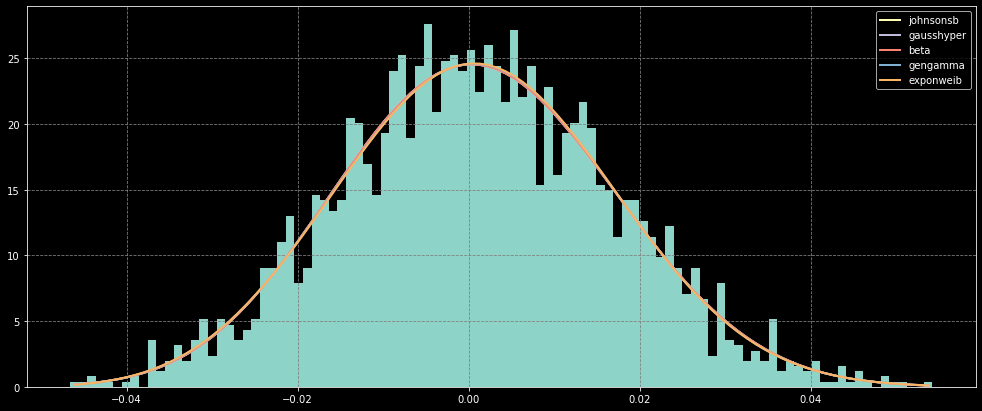

In [43]:
f=Fitter(S.R[1:], distributions=dist) #dropped nas and dist
f.fit()
f.summary() #plots (best 5 pdf adj), comment to only get params.

fig = plt.gcf()
fig.set_size_inches(17, 7)

print(f.get_best())

In [63]:
params= st.johnsonsb.fit(S.R[1:]) 
arg = params[:-2] #Arguments
loc = params[-2] #Mean
scale = params[-1] #Std.

(loc,scale,arg)

(-0.09883473542939863,
 0.22004633556084754,
 (0.6342643014935622, 3.354876233910681))

In [64]:
summary = pd.DataFrame({"mean" : loc, "std" : scale}, index = ["Parameters Returns"])
summary

,mean,std
Parameters Returns,-0.098835,0.220046


{'johnsonsb': (0.2677898877789944, 3.359761465475302, -0.10411705739193511, 0.2185776588485312)}


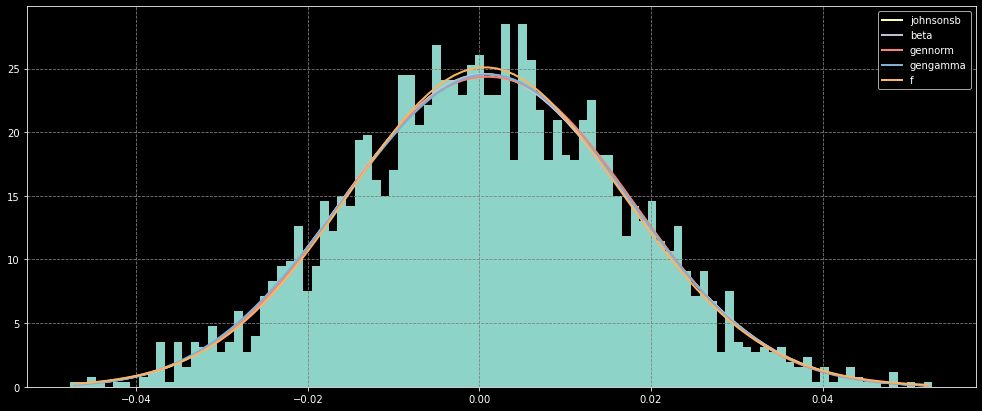

In [44]:
f=Fitter(S.r[1:], distributions=dist) #dropped nas and dist
f.fit()
f.summary() #plots (best 5 pdf adj), comment to only get params.

fig = plt.gcf()
fig.set_size_inches(17, 7)

print(f.get_best())

In [65]:
params= st.johnsonsb.fit(S.r[1:]) 
arg = params[:-2] #Arguments
loc = params[-2] #Mean
scale = params[-1] #Std.

(loc,scale,arg)

(-0.10411705739193511,
 0.2185776588485312,
 (0.2677898877789944, 3.359761465475302))

In [66]:
summary = pd.DataFrame({"mean" : loc, "std" : scale}, index = ["Parameters Log_R"])
summary

,mean,std
Parameters Log_R,-0.104117,0.218578


**Conclusions:** The distribution fitted to $R_t$ and $r_t$ are the same but their paramaters $\mu$ and $\sigma$ are not strictly the same as it was demonstrated by the tests so approximate values by the tests should be assumed.